<a href="https://colab.research.google.com/github/pq2312/Analyzing-TV-Data/blob/main/Analyzing_Super_Bowl_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. EXECUTIVE SUMMARY** 

In this notebook, we loaded, cleaned, then explored Super Bowl game, television, and halftime show data. We visualized the distributions of combined points, point differences, and halftime show performances using histograms. 

Key observations:

*   Ad cost increases lagged behind viewership increases
*   Blowouts do appear to lead to a drop in viewers

Data source: [Github](https://github.com/duncandam86/DataCamp-Projects/blob/master/TV%2C%20Halftime%20Shows%2C%20and%20the%20Big%20Game/datasets/super_bowls.csv) and [Datacamp](https://projects.datacamp.com/projects/684)

**II. ANALYSIS**

In [11]:
# import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-11-9d3585be6754>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
ls /content/gdrive/MyDrive/Python-Practice/Analyzing-TV

halftime_musicians.csv  super_bowls.csv  tv.csv


In [14]:
super_bowls = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/Analyzing-TV/super_bowls.csv')
tv = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/Analyzing-TV/tv.csv')
halftime_musicians = pd.read_csv('/content/gdrive/MyDrive/Python-Practice/Analyzing-TV/halftime_musicians.csv')

In [15]:
display(super_bowls.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [16]:
display(tv.head())

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


**1. Combined points distribution**

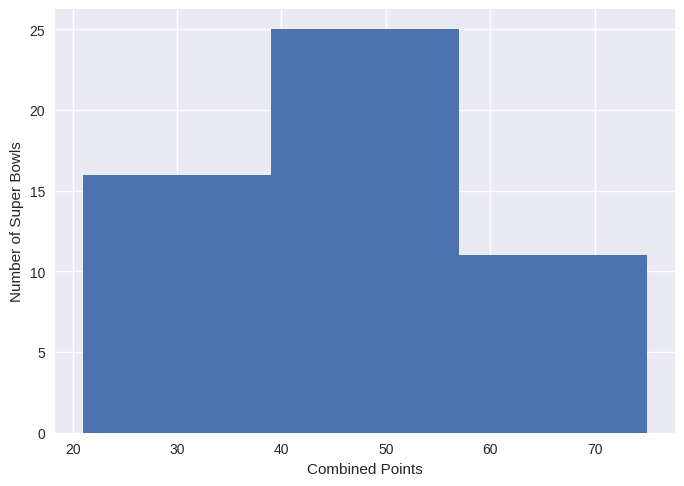

In [18]:
# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'],bins=3)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

In [19]:
# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9



*   **Most combined scores range from 40-50 points**, with extremes equidistant in opposite directions. The highest combined scores of 74 and 75 were achieved in two games featuring dominant quarterback performances. One example was the 2018 Super Bowl LII where Tom Brady's Patriots lost 41-33 to Nick Foles' underdog Eagles.

*   On the other hand, the lowest combined scores were seen in Super Bowl III and VII, which featured tough defenses that dominated. Super Bowl IX in New Orleans in 1975 also had a low score of 16-6 due to inclement weather. This was the second-coldest Super Bowl ever and the last to be played in such weather for over 30 years, indicating a preference for high-scoring games. 
Update: in Super Bowl LIII in 2019, the Patriots and Rams set a new record for the lowest-scoring Super Bowl with a combined score of just 16 points (13-3 for the Patriots).

**2. Point difference distribution**


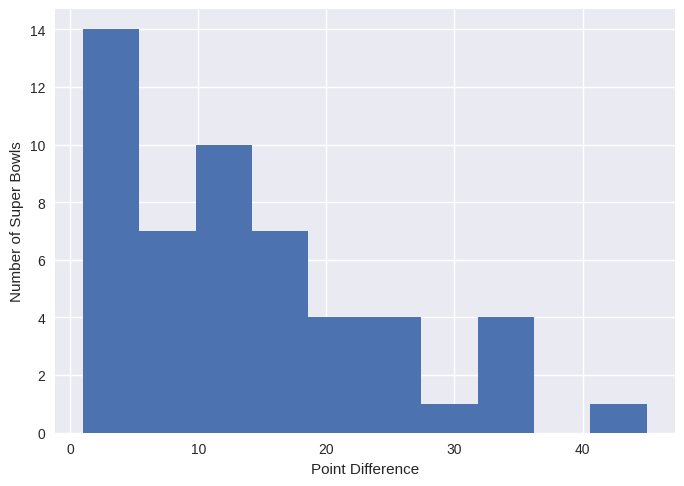

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [20]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 36])

*   The vast majority of Super Bowls are close games. Both teams are likely to be deserving if they've made it this far. 

*   The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991, which was best remembered for Scott Norwood's last-second missed field goal attempt that went wide right, kicking off four Bills Super Bowl losses in a row.

*   The biggest point discrepancy ever was 45 points where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

**3. Do large point differences translate to lost viewers?**


Let's combine our game data and TV to see if blowouts translate to lost viewers. We can plot household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) vs. point difference to find out.

In [22]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [23]:
import seaborn as sns

<Axes: xlabel='difference_pts', ylabel='share_household'>

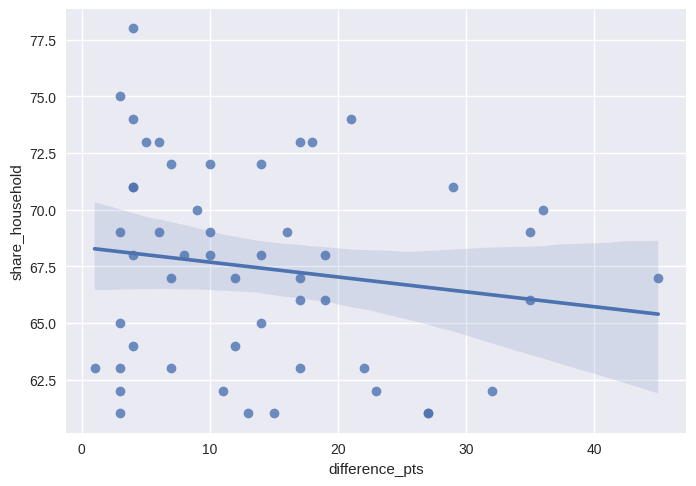

In [24]:
# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

**The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common.**

Though it matches our intuition, we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

**4. Viewership and the ad industry over time**

A 30-second spot costs a pretty $5 million now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost? We can find out using line plots that share a "Super Bowl" x-axis.



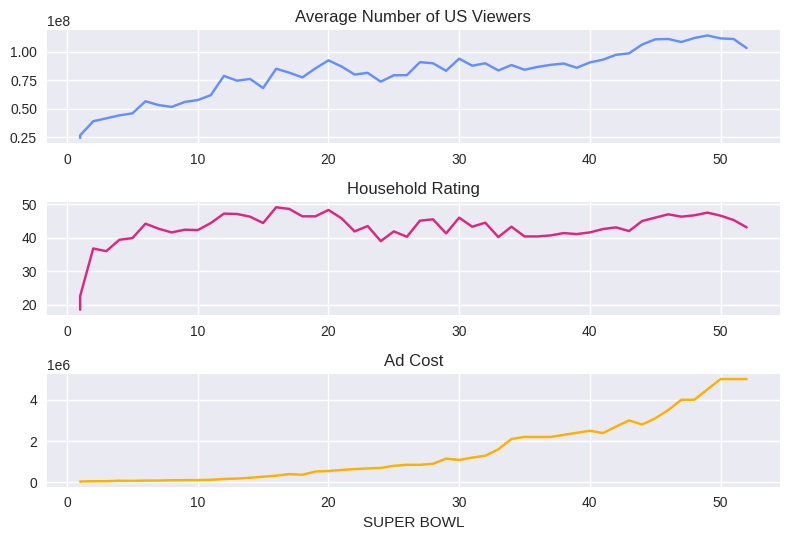

In [38]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF');
plt.title('Average Number of US Viewers');

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F');
plt.title('Household Rating');

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

**We can see viewers increased before ad costs did**. 

*   Maybe the networks weren't very data savvy and were slow to react.
*   Maybe halftime shows weren't that good in the earlier years? The modern spectacle of the Super Bowl has a lot to do with the cultural prestige of big halftime acts. Some offenders:



> Super Bowl XXVI in 1992: A Frosty The Snowman rap performed by children.


> Super Bowl XXIII in 1989: An Elvis impersonator that did magic tricks and didn't even sing one Elvis song.

It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out. The halftime shows before MJ indeed weren't that impressive, which we can see by filtering our halftime_musician data.

In [42]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


**5. Who has the most halftime show appearances?**

Lots of marching bands. 

Let's see all of the musicians that have done more than one halftime show, including their performance counts.

In [45]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances.super_bowl > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


**The world famous Grambling State University Tiger Marching Band takes the crown with six appearances**. Beyoncé, Justin Timberlake, Nelly, and Bruno Mars are the only post-Y2K musicians with multiple appearances (two each).

**6. Who performed the most songs in a halftime show?**

From our previous inspections, the num_songs column has lots of missing values:

A lot of the marching bands don't have num_songs entries.
For non-marching bands, missing data starts occurring at Super Bowl XX.
Let's filter out marching bands by filtering out musicians with the word "Marching" in them and the word "Spirit" (a common naming convention for marching bands is "Spirit of [something]"). Then we'll filter for Super Bowls after Super Bowl XX to address the missing data issue, then let's see who has the most number of songs.

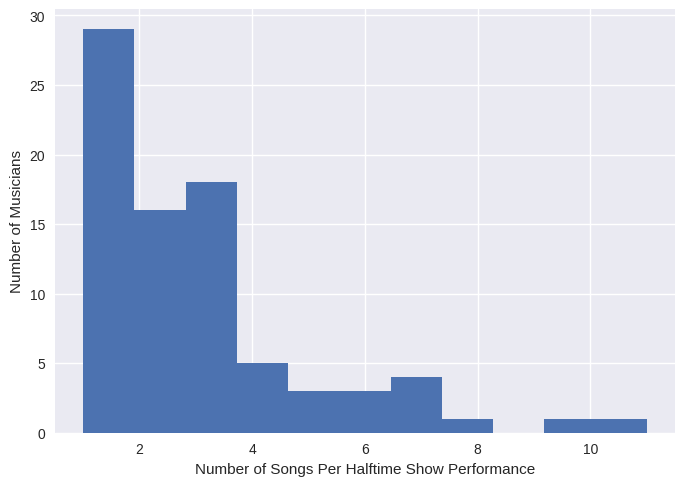

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [48]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins = most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

**So most non-band musicians do 1-3 songs per halftime show**. 

It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have. JT went off in 2018, wow. 11 songs! Diana Ross comes in second with 10 in her medley in 1996.